# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Maximillian Maleakhi Budiono
- **Email:** maxi.maleakhi3007max@gmail.com
- **ID Dicoding:** maxiii

<hr>

## Menentukan Pertanyaan Bisnis

- Apa produk yang paling banyak/sedikit terjual?
- Apa produk yang menghasilkan keuntungan paling banyak/sedikit?
- Berapa produk yang terjual setiap bulannya?
- Berapa biaya yang dikeluarkan customers setiap bulannya pada layanan E-Commerce kita?
- Bagaimana profile demografis customers? Manakah letak/daerah yang ramai akan customers layanan E-Commerce kita?

<hr>

## Import Semua Packages/Library yang Digunakan

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import urllib

<hr>

## Data Wrangling

### Gathering Data

Menampilkan semua dataset, yang nantinya digunakan untuk menjadi bahan pertimbangan dalam memilih dataset yang akan digunakan

In [166]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [167]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [168]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [169]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [170]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [171]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [172]:
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [173]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [174]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Berdasarkan `customers_dataset.csv` kita bisa mendapatkan letak geografi customers. Sehingga kita bisa mendapatkan insight berupa letak geografis yang memiliki jumlah customers paling banyak.
- Berdasarkan `geolocation_dataset.csv` kita bisa mendapatkan titik letak geografis customers. sehingga bisa mendukung insight diatas.
- Berdasarkan `orders_datasets.csv` ini adalah data paling penting yang hubungkan semua data lainnya. Dengan data ini, kita bisa mendapatkan _order_status_ yang nantinya bisa kita hubungkan dengan review customers pada `order_reviews_dataset.csv`.
- Berdasarkan `order_items_dataset.csv` kita bisa mendapatkan insight berupa produk apa yang paling diminati oleh customers beserta harga dan ongkos kirimnya.
- Berdasarkan `products_dataset.csv` kita bisa mendapatkan insight berupa nama" barang yang terjual, beserta berat dan ukurannya. Yang kemudian nantinya bisa diolah menjadi sebuah insight seperti pengaruh ukuran atau berat barang pada jumlah pembelian barang tersebut atau harganya.

### Assessing Data

Menilai kualitas dari seluruh data dan mencari masalah yang ada

In [175]:
# Menggunakan method info untuk melihat jumlah non-null value dan value type
print('\n', customers_df.info())
print('\n', geolocation_df.info())
print('\n', order_items_df.info())
print('\n', order_payments_df.info())
print('\n', order_reviews_df.info())
print('\n', orders_df.info())
print('\n', product_category_df.info())
print('\n', products_df.info())
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

> Terdapat beberapa dataset yang memiliki missing values dan kesalahan data type

Mencari jumlah null value

In [176]:
# Menggunakan method .isna() untuk mencari null value dan .sum() untuk menjumlahkannya
print('\nJumlah customers_df null value:\n\n', customers_df.isna().sum())
print('\nJumlah geolocation_df null value:\n\n', geolocation_df.isna().sum())
print('\nJumlah order_items_df null value:\n\n', order_items_df.isna().sum())
print('\nJumlah order_payments_df null value:\n\n', order_payments_df.isna().sum())
print('\nJumlah order_reviews_df null value:\n\n', order_reviews_df.isna().sum())
print('\nJumlah orders_df null value:\n\n', orders_df.isna().sum())
print('\nJumlah product_category_df null value:\n\n', product_category_df.isna().sum())
print('\nJumlah products_df null value:\n\n', products_df.isna().sum())
print('\nJumlah sellers_df null value:\n\n', sellers_df.isna().sum())


Jumlah customers_df null value:

 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah geolocation_df null value:

 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah order_items_df null value:

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah order_payments_df null value:

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah order_reviews_df null value:

 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_c

> - Terlihat jelas pada dataset `order_reviews_df`, `orders_df`, dan `products_df` terdapat beberapa kolom yang memiliki missing value.
> - Pada `order_reviews_df` null value terjadi karena beberapa orang memang tidak memberikan komentar.
> - Pada `orders_df` null value terjadi karena tidak semua order memiliki status **delivered**

Mencari data duplikasi

In [177]:
# Method .duplicated untuk menampilkan jumlah data yang duplikasi
print('\nJumlah customers duplicate value:\n\n', customers_df.duplicated().sum())
print('\nJumlah geolocation_df duplicate value:\n\n', geolocation_df.duplicated().sum())
print('\nJumlah order_items_df duplicate value:\n\n', order_items_df.duplicated().sum())
print('\nJumlah order_payments_df duplicate value:\n\n', order_payments_df.duplicated().sum())
print('\nJumlah order_reviews_df duplicate value:\n\n', order_reviews_df.duplicated().sum())
print('\nJumlah orders_df duplicate value:\n\n', orders_df.duplicated().sum())
print('\nJumlah product_category_df duplicate value:\n\n', product_category_df.duplicated().sum())
print('\nJumlah products_df duplicate value:\n\n', products_df.duplicated().sum())
print('\nJumlah sellers_df duplicate value:\n\n', sellers_df.duplicated().sum())


Jumlah customers duplicate value:

 0

Jumlah geolocation_df duplicate value:

 261831

Jumlah order_items_df duplicate value:

 0

Jumlah order_payments_df duplicate value:

 0

Jumlah order_reviews_df duplicate value:

 0

Jumlah orders_df duplicate value:

 0

Jumlah product_category_df duplicate value:

 0

Jumlah products_df duplicate value:

 0

Jumlah sellers_df duplicate value:

 0


> Terdapat banyak data duplikasi pada **geolocation_df**

Menampilkan parameter statistik

In [178]:
# method .describe() untuk menampilkan mean, min, max, dll
print('\ncustomers describe:\n\n', customers_df.describe(include='all'))
print('\ngeolocation_df describe:\n\n', geolocation_df.describe(include='all'))
print('\norder_items_df describe:\n\n', order_items_df.describe(include='all'))
print('\norder_payments_df describe:\n\n', order_payments_df.describe(include='all'))
print('\norder_reviews_df describe:\n\n', order_reviews_df.describe(include='all'))
print('\norders_df describe:\n\n', orders_df.describe(include='all'))
print('\nproduct_category_df describe:\n\n', product_category_df.describe(include='all'))
print('\nproducts_df describe:\n\n', products_df.describe(include='all'))
print('\nsellers_df describe:\n\n', sellers_df.describe(include='all'))


customers describe:

                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix custome

> Masalah-masalah ini akan diperbaiki pada tahap Cleaning Data

**Insight:**
- Masih terdapat beberapa dataset yang memiliki missing value seperti, `order_reviews_df`, `orders_df`, dan `products_df`, kemudian duplicated value seperti `geolocation_df` dan tipe data yang salah. Pada langkah Data Cleaning, masalah" ini akan diperbaiki. Sehingga bisa digunakan dalam menemukan beberapa insight.
- Setelah melakukan assessing data ini, kita dapat melihat ada beberapa hal yang bisa dimanfaatkan dalam menjawab pertanyaan nanti. Contohnya pada `order_payments_df` pada column `payment_value` kita dapat melihat nilai **mean** atau rata"nya yang kemudian bisa kita olah sebagai garis rata" untuk menjawab berbagai pertanyaan bisnis.
- Banyak sekali insight" yang bisa didapat dari proses ini. Karena kita bisa melihat nilai minimum, maximum, std, dll yang nantinya nilai" ini bisa dimanfaatkan lebih jauh lagi. Dengan proses ini kita bisa melihat secara sekilas data" yang berguna seperti, pada `customers_df` terlihat bahwa mayoritas customer berada di **Sao Paulo** yang nantinya data ini bisa digunakan untuk menjawab pertanyaan bisnis.

<hr>

### Cleaning Data

#### geolocation_df

Drop duplicated data pada **geolocation_df**

In [179]:
geolocation_df.drop_duplicates(inplace=True)
print('Jumlah geolocation_df duplicate value:\n\n', geolocation_df.duplicated().sum())

Jumlah geolocation_df duplicate value:

 0


#### orders_df

Mengubah beberapa tipe data

Hanya mengubah tipe data untuk kolom" yang merupakan datetime pada `orders_df`

In [180]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [181]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Mengambil data yang hanya memiliki status _delivered_

In [182]:
orders_df["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

> Saya hanya akan mengambil order yang memiliki status _delivered_ saja dan menyimpannya kedalam variabel `orders_delivered_df`. Ini disebabkan untuk menemukan total order yang benar" sampai di customer. Selain itu, mayoritas dari data `orders_df` juga memiliki status _delivered_

In [183]:
orders_df_all = orders_df

In [184]:
orders_df = orders_df[orders_df.order_status == 'delivered']

In [185]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [186]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [187]:
orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

> Karena jumlah missing valuenya hanya sedikit, kita drop saja

In [188]:
orders_df.dropna(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\1444095449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df.dropna(inplace=True)


In [189]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### order_reviews_df

Terdapat null value pada kolom `review_comment_title` dan `review_comment_message`. Kita anggap saja customers memberikan review tersebut tanpa memberikan komentar, dan hanya memberikan `review_score`

In [190]:
order_reviews_df.fillna(value='no comment', inplace=True)

In [191]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comment,no comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comment,no comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comment,no comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comment,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,no comment,no comment,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,no comment,no comment,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,no comment,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,no comment,no comment,2018-07-01 00:00:00,2018-07-02 12:59:13


Mengubah tipe data pada kolom-kolom `order_review_df` yang seharusnya memiliki tipe data datetime

In [192]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [193]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### order_items_df

Mengubah tipe data datetime

In [194]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [195]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### products_df

Mengganti mising value pada `product_df` di kolom `product_category_name` menjadi _others_, untuk kolom yang lain tidak saya gunakan.

In [196]:
products_df['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [197]:
products_df['product_category_name'].fillna(value='others', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\435801747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(value='others', inplace=True)


In [198]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [199]:
print('\nJumlah customers_df null value:\n\n', customers_df.isna().sum())
print('\nJumlah geolocation_df null value:\n\n', geolocation_df.isna().sum())
print('\nJumlah order_items_df null value:\n\n', order_items_df.isna().sum())
print('\nJumlah order_payments_df null value:\n\n', order_payments_df.isna().sum())
print('\nJumlah order_reviews_df null value:\n\n', order_reviews_df.isna().sum())
print('\nJumlah orders_df null value:\n\n', orders_df.isna().sum())
print('\nJumlah product_category_df null value:\n\n', product_category_df.isna().sum())
print('\nJumlah products_df null value:\n\n', products_df.isna().sum())
print('\nJumlah sellers_df null value:\n\n', sellers_df.isna().sum())


Jumlah customers_df null value:

 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah geolocation_df null value:

 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah order_items_df null value:

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah order_payments_df null value:

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah order_reviews_df null value:

 review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message  

In [200]:
products_df.dropna(inplace=True)

In [201]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [202]:
print('\nJumlah customers_df null value:\n\n', customers_df.info())
print('\nJumlah geolocation_df null value:\n\n', geolocation_df.info())
print('\nJumlah order_items_df null value:\n\n', order_items_df.info())
print('\nJumlah order_payments_df null value:\n\n', order_payments_df.info())
print('\nJumlah order_reviews_df null value:\n\n', order_reviews_df.info())
print('\nJumlah orders_df null value:\n\n', orders_df.info())
print('\nJumlah product_category_df null value:\n\n', product_category_df.info())
print('\nJumlah products_df null value:\n\n', products_df.info())
print('\nJumlah sellers_df null value:\n\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah customers_df null value:

 None
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city  

**Insight:**
- Setelah melakukan Data Cleaning, kita bisa menggunakan data-data yang memiliki value datetime menjadi sebuah insight dalam membuat timeseries seperti _line chart_ pada tahap data visualization.
- Kita dapat menggunakan `order_reviews_df` untuk menemukan apa perasaan customers setelah menerima barang, dan apa penyebabnya.
- Kita telah menspesifikasikan `orders_df` menjadi orders yang hanya memiliki status _delivered_ yang nantinya data ini bisa kita gunakan untuk menjawab pertanyaan bisnis seperti __Apa produk yang paling banyak/sedikit terjual?__

<hr>

## Exploratory Data Analysis (EDA)

### Explore orders_df

Membuat kolom baru yaitu `delivery_time` dengan satuan hari yang berisi selisih `order_delivered_customer_date` dan `order_purchase_timestamp` 

In [203]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\3044656413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df["delivery_time"] = round(delivery_time/86400)


In [204]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


### Explore order_payments_df

In [205]:
order_payments_df["payment_type"].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

> Mayoritas masih menggunakan pembayaran melalui _credit card_

### Explore order_reviews_df

Mencari jumlah rating yang diberikan customers

In [206]:
order_reviews_df["review_score"].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

> Rating tertinggi masih pada rating 5 dan 4, jadi aman" saja dan tidak perlu dilakukan analisis lebih lanjut

### Explore and Merged orders_df, order_reviews_df, dan order_payments_df

In [207]:
ordersrev_df = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="left",
    left_on='order_id',
    right_on='order_id'
)

ordersrev_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,no comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,no comment,no comment,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,no comment,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,e50934924e227544ba8246aeb3770dd4,5.0,no comment,no comment,2018-02-17,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96979,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,e262b3f92d1ce917aa412a9406cf61a6,5.0,no comment,no comment,2017-03-22,2017-03-23 11:02:08
96980,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,29bb71b2760d0f876dfa178a76bc4734,4.0,no comment,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01
96981,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,371579771219f6db2d830d50805977bb,5.0,no comment,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57
96982,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,no comment,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56


In [208]:
ordersrev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96984 entries, 0 to 96983
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96984 non-null  object        
 1   customer_id                    96984 non-null  object        
 2   order_status                   96984 non-null  object        
 3   order_purchase_timestamp       96984 non-null  datetime64[ns]
 4   order_approved_at              96984 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96984 non-null  datetime64[ns]
 6   order_delivered_customer_date  96984 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96984 non-null  datetime64[ns]
 8   delivery_time                  96984 non-null  float64       
 9   review_id                      96338 non-null  object        
 10  review_score                   96338 non-null  float64       
 11  review_comment_

In [209]:
ordersrev_df.groupby(by='review_score').delivery_time.mean().reset_index()

,review_score,delivery_time
0,1.0,21.268474
1,2.0,16.618367
2,3.0,14.221357
3,4.0,12.270558
4,5.0,10.646275


> Terlihat jelas bahwa semakin lama `delivery_time` nya, maka semakin sedikit `review_score` nya. Ini menandakan bahwa review_score dan `delivery_time` saling berhubungan.

Mencoba merge `orders_df` dengan `order_payments_df`

In [210]:
orderspay_df = pd.merge(
    left=orders_df,
    right=order_payments_df,
    how="left",
    left_on='order_id',
    right_on='order_id'
)

orderspay_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100729,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,1.0,credit_card,3.0,85.08
100730,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,1.0,credit_card,3.0,195.00
100731,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,1.0,credit_card,5.0,271.01
100732,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,1.0,credit_card,4.0,441.16


In [211]:
orderspay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100734 entries, 0 to 100733
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100734 non-null  object        
 1   customer_id                    100734 non-null  object        
 2   order_status                   100734 non-null  object        
 3   order_purchase_timestamp       100734 non-null  datetime64[ns]
 4   order_approved_at              100734 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100734 non-null  datetime64[ns]
 6   order_delivered_customer_date  100734 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100734 non-null  datetime64[ns]
 8   delivery_time                  100734 non-null  float64       
 9   payment_sequential             100733 non-null  float64       
 10  payment_type                   100733 non-null  object        
 11  

Merge ketiganya

In [212]:
ordersrevpay_df = pd.merge(
    left=ordersrev_df,
    right=order_payments_df,
    how="left",
    left_on='order_id',
    right_on='order_id'
)

ordersrevpay_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,no comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,no comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,no comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,no comment,no comment,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101298,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,e262b3f92d1ce917aa412a9406cf61a6,5.0,no comment,no comment,2017-03-22,2017-03-23 11:02:08,1.0,credit_card,3.0,85.08
101299,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,29bb71b2760d0f876dfa178a76bc4734,4.0,no comment,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,1.0,credit_card,3.0,195.00
101300,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,371579771219f6db2d830d50805977bb,5.0,no comment,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,1.0,credit_card,5.0,271.01
101301,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,no comment,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,1.0,credit_card,4.0,441.16


### Explore dan Merged order_items_df, products_df, dan product_category_df

In [213]:
productscat_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

productscat_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [214]:
orderproducts_df = pd.merge(
    left=productscat_df,
    right=order_items_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

orderproducts_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
111042,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111043,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111044,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [215]:
orderproducts_df.groupby(by='product_category_name').price.sum().sort_values(ascending=False).reset_index()

,product_category_name,price
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32
...,...,...
68,flores,1110.04
69,casa_conforto_2,760.27
70,cds_dvds_musicais,730.00
71,fashion_roupa_infanto_juvenil,569.85


> Kita menemukan product `beleza_saude` yang memberikan jumlah pemasukan paling banyak (tidak termasuk ongkos kirim) dari hasil merge 2 dataset ini. Namun kita masih perlu analisis lebih lanjut dengan manggabungkannya dengan `orders_df`.

### Explore dan Merge ordersrevpay_df dengan customers_df

In [216]:
ordersrevpaycust_df = pd.merge(
    left=ordersrevpay_df,
    right=customers_df,
    how="left",
    left_on='customer_id',
    right_on='customer_id'
)

ordersrevpaycust_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8d5266042046a06655c8db133d120ba5,...,2018-08-08,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,...,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101298,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,e262b3f92d1ce917aa412a9406cf61a6,...,2017-03-22,2017-03-23 11:02:08,1.0,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
101299,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,29bb71b2760d0f876dfa178a76bc4734,...,2018-03-01,2018-03-02 17:50:01,1.0,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
101300,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,371579771219f6db2d830d50805977bb,...,2017-09-22,2017-09-22 23:10:57,1.0,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
101301,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,8ab6855b9fe9b812cd03a480a25058a1,...,2018-01-26,2018-01-27 09:16:56,1.0,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


### Explore dan Merge Semua dataset yang akan digunakan

In [217]:
all_df = pd.merge(
    left=ordersrevpaycust_df,
    right=orderproducts_df,
    how="left",
    left_on='order_id',
    right_on='order_id'
)

all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8d5266042046a06655c8db133d120ba5,...,400.0,19.0,13.0,19.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,...,420.0,24.0,19.0,21.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115476,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,29bb71b2760d0f876dfa178a76bc4734,...,4950.0,40.0,10.0,40.0,baby,1.0,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
115477,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,371579771219f6db2d830d50805977bb,...,13300.0,32.0,90.0,22.0,home_appliances_2,1.0,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
115478,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,8ab6855b9fe9b812cd03a480a25058a1,...,6550.0,20.0,20.0,20.0,computers_accessories,1.0,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
115479,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,8ab6855b9fe9b812cd03a480a25058a1,...,6550.0,20.0,20.0,20.0,computers_accessories,2.0,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [218]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115481 entries, 0 to 115480
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115481 non-null  object        
 1   customer_id                    115481 non-null  object        
 2   order_status                   115481 non-null  object        
 3   order_purchase_timestamp       115481 non-null  datetime64[ns]
 4   order_approved_at              115481 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115481 non-null  datetime64[ns]
 6   order_delivered_customer_date  115481 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115481 non-null  datetime64[ns]
 8   delivery_time                  115481 non-null  float64       
 9   review_id                      114624 non-null  object        
 10  review_score                   114624 non-null  float64       
 11  

In [219]:
all_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
delivery_time                       0
review_id                         857
review_score                      857
review_comment_title              857
review_comment_message            857
review_creation_date              857
review_answer_timestamp           857
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_id                       1420
product_category_name            1420
product_name_lenght              1420
product_desc

In [220]:
all_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_score,review_creation_date,review_answer_timestamp,payment_sequential,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,shipping_limit_date,price,freight_value
count,115481,115481,115481,115481,115481,115481.000000,114624.000000,114624,114624,115478.000000,...,114061.000000,114061.000000,114061.000000,114061.000000,114061.000000,114061.000000,114061.000000,114061,114061.000000,114061.000000
mean,2017-12-31 13:27:19.037599488,2017-12-31 23:53:02.242983680,2018-01-03 20:15:52.982308608,2018-01-13 01:08:41.702938368,2018-01-24 09:31:19.883270912,12.447087,4.082068,2018-01-12 22:54:13.172110592,2018-01-16 02:35:05.756796160,1.091264,...,784.838525,2.206521,2108.562629,30.289056,16.606474,23.105032,1.197543,2018-01-07 19:36:19.825566976,120.012864,20.009694
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,1.000000,2016-10-06 00:00:00,2016-10-07 18:32:28,1.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,2016-09-19 23:11:33,0.850000,0.000000
25%,2017-09-12 20:38:12,2017-09-13 10:15:16,2017-09-15 15:44:43,2017-09-23 14:26:07,2017-10-04 00:00:00,7.000000,4.000000,2017-09-23 18:00:00,2017-09-27 16:54:43,1.000000,...,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,2017-09-20 11:55:21,39.900000,13.080000
50%,2018-01-19 01:43:38,2018-01-19 14:16:59,2018-01-23 19:12:51,2018-02-01 17:02:22,2018-02-15 00:00:00,10.000000,5.000000,2018-02-02 00:00:00,2018-02-04 23:35:30.500000,1.000000,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2018-01-26 13:58:43,74.900000,16.320000
75%,2018-05-04 11:53:05,2018-05-04 18:29:58,2018-05-07 19:42:00,2018-05-15 12:17:46,2018-05-25 00:00:00,16.000000,5.000000,2018-05-16 00:00:00,2018-05-20 11:09:10.500000,1.000000,...,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,2018-05-10 17:11:44,133.000000,21.190000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,26.000000,...,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,NaN,NaN,NaN,NaN,NaN,9.446645,1.346281,NaN,NaN,0.687073,...,650.583250,1.718026,3768.453359,16.158009,13.439280,11.739753,0.703184,NaN,182.407708,15.727119


> Karena missing value pada `all_df` tidak terlalu banyak dan tidak mempengaruhi keseluruhan data jika dihapus, maka kita akan drop missing valuenya. Kemungkinan  besar ini disebabkan karena tipe orders saya khususkan untuk status `delivered` sehingga menyebabkan orders lainnya menghilang, selain itu kemungkinan ada juga orders yang tidak memiliki review, sehingga terjadi missing value. Tapi ini bukan sebuah masalah.

In [221]:
all_df.dropna(inplace=True)

In [222]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113186 entries, 0 to 115480
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113186 non-null  object        
 1   customer_id                    113186 non-null  object        
 2   order_status                   113186 non-null  object        
 3   order_purchase_timestamp       113186 non-null  datetime64[ns]
 4   order_approved_at              113186 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113186 non-null  datetime64[ns]
 6   order_delivered_customer_date  113186 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113186 non-null  datetime64[ns]
 8   delivery_time                  113186 non-null  float64       
 9   review_id                      113186 non-null  object        
 10  review_score                   113186 non-null  float64       
 11  revie

In [223]:
all_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_time                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

### Explore all_df

In [224]:
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8d5266042046a06655c8db133d120ba5,...,400.0,19.0,13.0,19.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,...,420.0,24.0,19.0,21.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115476,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,29bb71b2760d0f876dfa178a76bc4734,...,4950.0,40.0,10.0,40.0,baby,1.0,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
115477,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,371579771219f6db2d830d50805977bb,...,13300.0,32.0,90.0,22.0,home_appliances_2,1.0,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
115478,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,8ab6855b9fe9b812cd03a480a25058a1,...,6550.0,20.0,20.0,20.0,computers_accessories,1.0,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
115479,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,8ab6855b9fe9b812cd03a480a25058a1,...,6550.0,20.0,20.0,20.0,computers_accessories,2.0,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


Mencari penyebab rating yang diberikan customers

In [225]:
all_df.groupby(by='review_score').delivery_time.mean().reset_index()

,review_score,delivery_time
0,1.0,19.555245
1,2.0,15.713988
2,3.0,13.989404
3,4.0,12.200541
4,5.0,10.628187


> Ternyata `review_score` dan `delivery_time` saling berhubungan. Semakin lama `delivery_time` maka semakin rendah `review_score`. Artinya 2 hal ini berkorelasi negatif.

Mencoba menemukan sedikit insight sebelum explanatory analysis

In [226]:
all_df.groupby(by=['customer_city', 'product_category_name']).agg(
    {
        'order_id': 'count',
        'payment_value': 'sum'
    }
)

order_id  payment_value
customer_city       product_category_name                          
abadia dos dourados cool_stuff                     1         219.63
                    esporte_lazer                  1         135.59
                    livros_interesse_geral         1          58.28
abadiania           eletroportateis                1        1025.52
abaete              bebes                          1          82.70
...                                              ...            ...
ze doca             bebes                          1         112.87
                    esporte_lazer                  1         188.50
                    ferramentas_jardim             1          66.51
                    instrumentos_musicais          1         408.04
zortea              informatica_acessorios         1          90.88

[24809 rows x 2 columns]

> Mencari produk yang banyak dibeli customers

In [227]:
all_df.groupby(by='product_category_name_english').order_id.count().sort_values(ascending=False).reset_index()

,product_category_name_english,order_id
0,bed_bath_table,11684
1,health_beauty,9747
2,sports_leisure,8733
3,furniture_decor,8554
4,computers_accessories,7926
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,15
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,7


> Ternyata, setelah ditelaah lebih dalam produk yang terjual paling banyak adalah `cama_mesa_banho` atau `bed_bath_table`

**Insight:**
- Setelah menggabungkan semua dataset menjadi satu di `all_df`, kita bisa menggunakan data ini untuk menemukan beberapa insight dalam menjawab pertanyaan bisnis pada tahap explanatory analysis
- Kita bisa menggunakan `product_category_name` dan menghitung jumlah ordersnya dan kita akan mendapatkan product yang paling diminati customers.
- Kita juga bisa menemukan apa penyebab dari berbagai macam rating yang diberikan oleh customers dengan memadukan `review_score` dengan `delivery_time`. Masih banyak insight yang bisa kita dapat setelah menggabungkan semua dataset.

<hr>

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa produk yang paling banyak dan paling sedikit terjual ?

In [228]:
sum_order_products_df = all_df.groupby(by="product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()
sum_order_products_df.head(15)

,product_category_name_english,order_id
0,bed_bath_table,11684
1,health_beauty,9747
2,sports_leisure,8733
3,furniture_decor,8554
4,computers_accessories,7926
5,housewares,7154
6,watches_gifts,6030
7,telephony,4578
8,garden_tools,4451
9,auto,4259


In [229]:
sum_order_products_df.rename(columns={
    'product_category_name_english': 'product name',
    'order_id': 'quantity'
}, inplace=True)

In [230]:
sum_order_products_df.head(15)

,product name,quantity
0,bed_bath_table,11684
1,health_beauty,9747
2,sports_leisure,8733
3,furniture_decor,8554
4,computers_accessories,7926
5,housewares,7154
6,watches_gifts,6030
7,telephony,4578
8,garden_tools,4451
9,auto,4259


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\1582341519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product name", data=sum_order_products_df.head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\1582341519.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product name", data=sum_order_products_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])


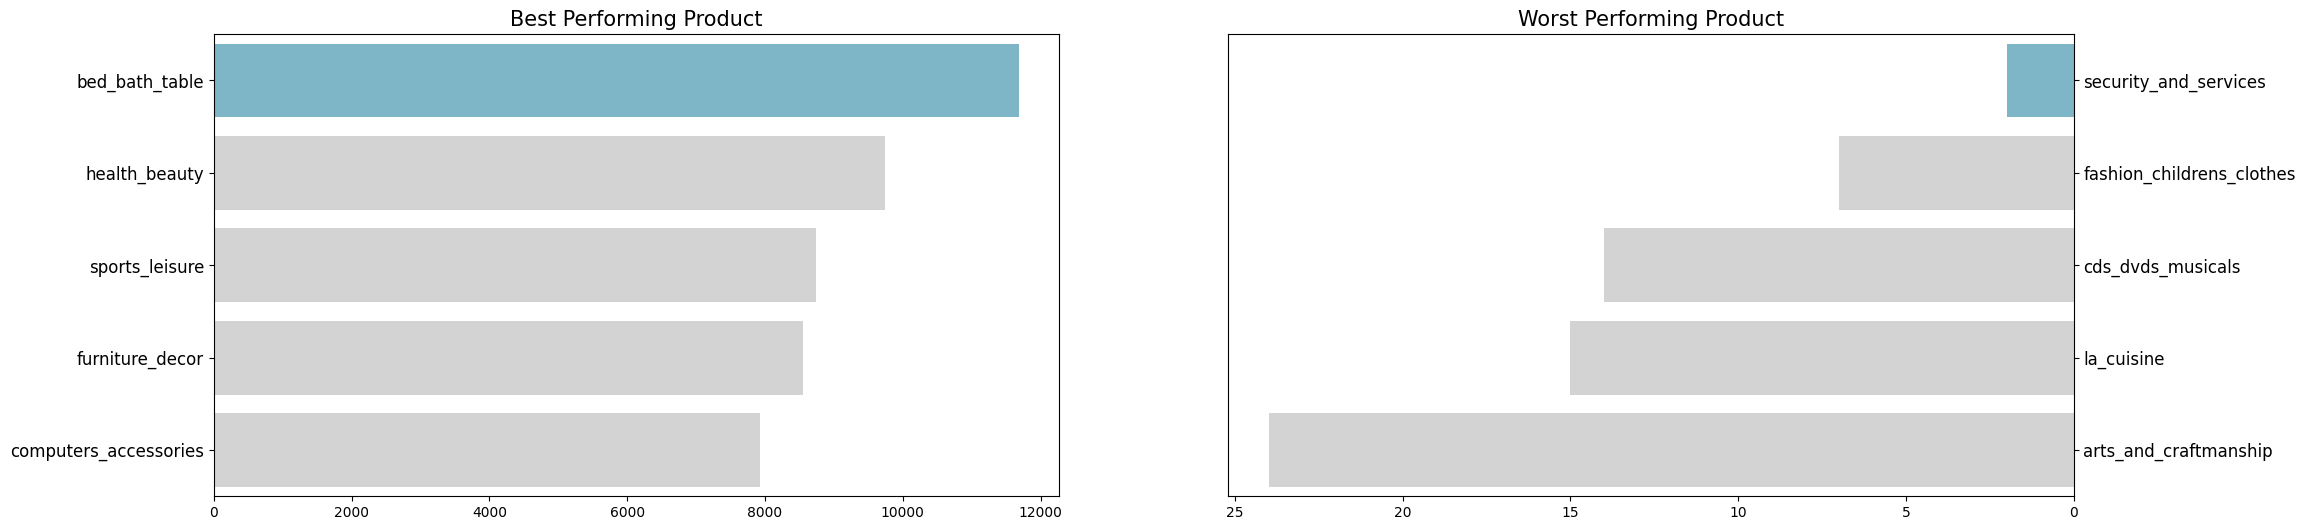

In [231]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product name", data=sum_order_products_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity", y="product name", data=sum_order_products_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

> `bed_bath_table` adalah `Produk yang paling banyak terjual` dan `security_and_services` adalah `Produk yang paling sedikit terjual`

### Pertanyaan 2: Apa produk yang menghasilkan keuntungan paling banyak dan paling sedikit?

In [232]:
product_revenue_df = all_df.groupby(by='product_category_name_english').payment_value.sum().sort_values(ascending=False).reset_index()
product_revenue_df.head(15)

,product_category_name_english,payment_value
0,bed_bath_table,1706872.26
1,health_beauty,1611835.65
2,computers_accessories,1557592.86
3,furniture_decor,1391435.19
4,watches_gifts,1380171.71
5,sports_leisure,1348370.09
6,housewares,1067227.12
7,garden_tools,807503.95
8,auto,783016.78
9,cool_stuff,737950.40


In [233]:
product_revenue_df.rename(columns={
    'product_category_name_english': 'product name',
    'payment_value': 'revenue'
}, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\3983888291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="product name", data=product_revenue_df.head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\3983888291.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="product name", data=product_revenue_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])


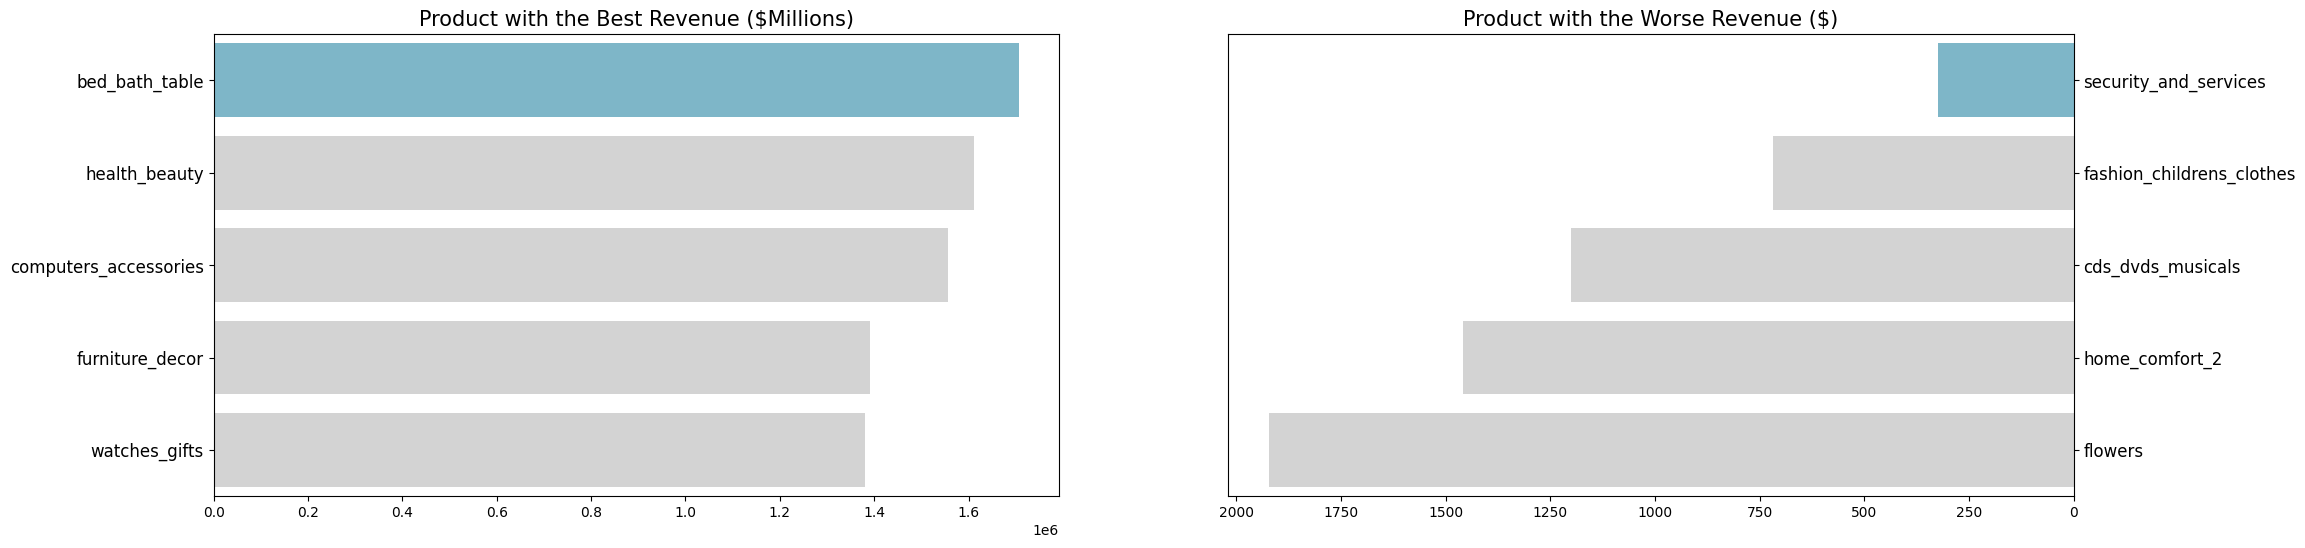

In [234]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="revenue", y="product name", data=product_revenue_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Product with the Best Revenue ($Millions)", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="revenue", y="product name", data=product_revenue_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Product with the Worse Revenue ($)", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

> `bed_bath_table` juga adalah `Produk dengan revenue terbesar` dan `security_and_services` adalah `Produk dengan revenue terkecil`

### Pertanyaan 3: Berapa produk yang terjual setiap bulannya?

In [235]:
all_df_2017 = all_df[all_df['order_purchase_timestamp'].dt.year == 2017]

monthly_orders_df = all_df_2017.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\3329801482.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df_2017.resample(rule='M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
0,January,728,172882.76
1,February,1582,314200.34
2,March,2478,491335.05
3,April,2228,441232.49
4,May,3437,687084.74


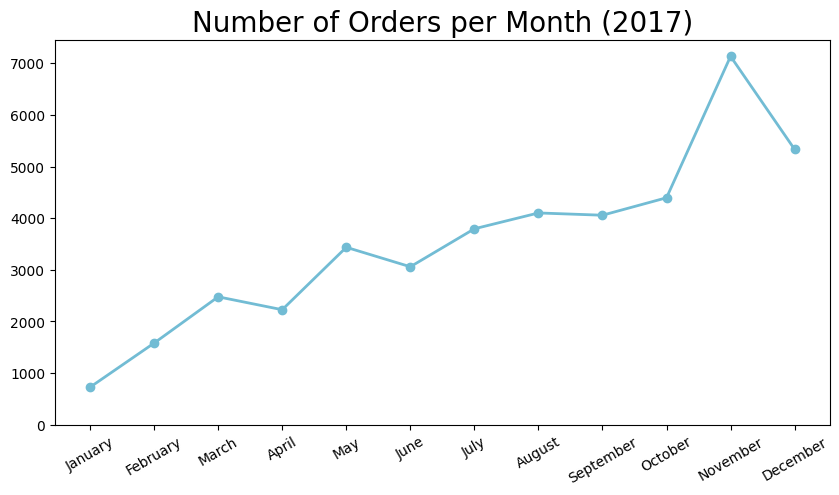

In [236]:
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2017)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.ylim(bottom=0)
plt.show()

> Terjadi kenaikan jumlah orders pada tahun 2017

### Pertanyaan 4: Berapa biaya yang dikeluarkan customers setiap bulannya pada layanan E-Commerce kita?

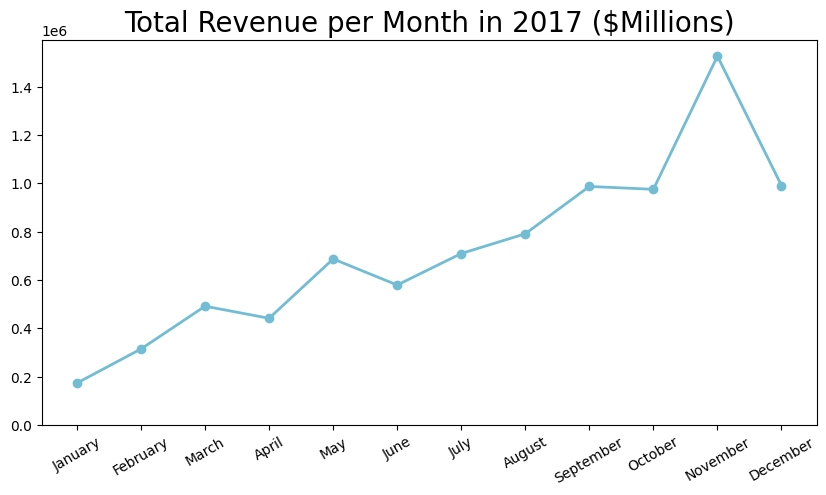

In [237]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month in 2017 ($Millions)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.ylim(bottom=0)
plt.show()

> Terjadi kenaikan revenue pada tahun 2017

> Saya mengambil tahun 2017 karena paling lengkap. karena pada data terdapat tahun 2016-2018, sehingga tahun 2017lah yang paling lengkap

### Pertanyaan 5: Bagaimana profile demografis customers? Manakah letak/daerah yang ramai akan customers layanan E-Commerce kita?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14856\395277210.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


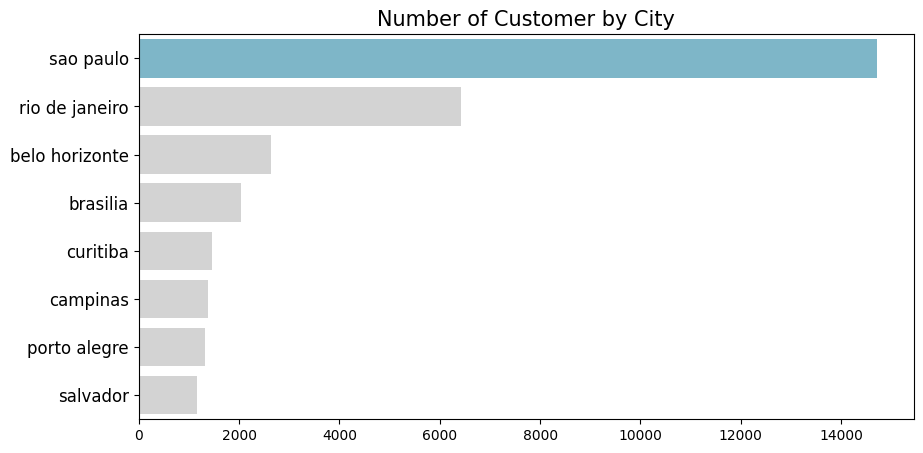

In [238]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer count"
}, inplace=True)
bycity_df

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer count", 
    y="customer_city",
    data=bycity_df.sort_values(by="customer count", ascending=False).head(8),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

> Mayoritas customers berada di kota sao paulo

**Insight:**
- Berdasarkan tahap visualisasi dan explanatory ini kita menjadi bisa menjawab berbagai pertanyaan bisnis di awal. Contohnya:
- `bed_bath_table` adalah `Produk yang paling banyak terjual` dan `security_and_services` adalah `Produk yang paling sedikit terjual`.
- `bed_bath_table` juga adalah `Produk dengan revenue terbesar` dan `security_and_services` adalah `Produk dengan revenue terkecil`
- Terjadi kenaikan jumlah orders dan revenue ada tahun 2017.
- Mayoritas customers berada di kota `Sao Paulo`

<hr>

## Analisis Lanjutan (Opsional)

### Geospatial Analysis

In [239]:
geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
geolocation[geolocation['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [240]:
geolocation_pointer = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_pointer = geolocation_pointer.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [241]:
customers_geolocation = pd.merge(
    left=all_df,
    right=geolocation_pointer,
    how='inner',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

In [242]:
customers_geolocation.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP,-23.576058,-46.587276
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,são paulo,SP,-23.575573,-46.587384
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP,-23.576058,-46.587276
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,são paulo,SP,-23.575573,-46.587384
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP,-23.576058,-46.587276
5,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,...,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,são paulo,SP,-23.575573,-46.587384
6,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8d5266042046a06655c8db133d120ba5,...,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA,-12.126533,-45.008244
7,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,...,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO,-16.743812,-48.514624
8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,...,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianópolis,GO,-16.745360,-48.515884
9,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,359d03e676b3c069f62cadba8dd3f6e8,...,1.0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN,-5.773971,-35.273994


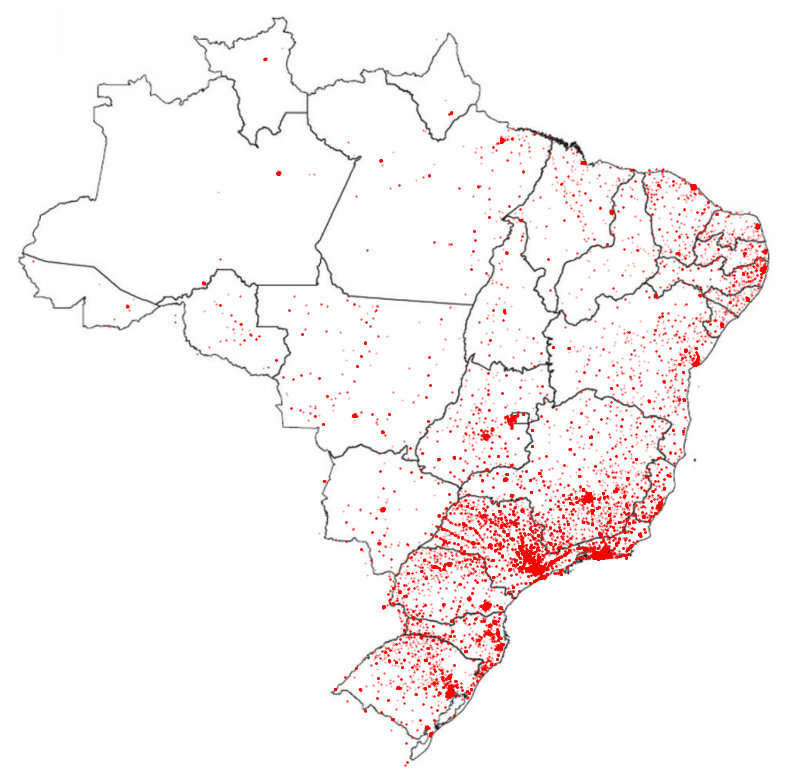

In [243]:
brazil_geolocation = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
map = customers_geolocation.drop_duplicates(subset='customer_unique_id').plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='red')
plt.axis('off')
plt.imshow(brazil_geolocation, extent=[-73.88283055, -33.8,-33.75116944,5.4])
plt.show()

In [244]:
# geolocation_df.to_csv('Geolocation.csv', index=False)

In [245]:
# all_df.to_csv("main_data.csv", index=False)

**Insight:**
- Terlihat pada peta bahwa customers terbanyak berada di bagian tenggara Brazil tepatnya di `Sao Paulo`, walaupun tidak tertulis namanya disini, namun bisa dilihat bahwa lokasi yang memiliki banyak titik merah adalah `Sao Paulo`

<hr>

## Conclusion

- Apa produk yang paling banyak/sedikit terjual?
> `bed_bath_table` adalah `Produk yang paling banyak terjual` dan `security_and_services` adalah `Produk yang paling sedikit terjual`. Saran saya adalah berkerja sama dengan seller dengan memfokuskan strategi pemasaran pada kategori produk `bed_bath_table`, karena produk ini memiliki penjualan yang paling tinggi. Selain itu, bisa juga mempertimbangkan untuk melakukan promosi pada produk-produk ini untuk mempertahankan dan meningkatkan penjualan. Namun, untuk kategori `security_and_services`, harus dievaluasi apa penyebab penjualan sangat rendah. Bisa jadi ada masalah pada harga, penawaran, dll. Mempertimbangkan untuk mengoptimalkan penjualan produk tersebut.

<br>

- Apa produk yang menghasilkan keuntungan paling banyak/sedikit?
> `bed_bath_table` juga adalah `Produk dengan revenue terbesar` dan `security_and_services` adalah `Produk dengan revenue terkecil`. Saran saya, berkerja sama dengan seller dengan menambahkan fitur pada produk seperti bundling produk atau program loyalitas untuk meningkatkan pembelian berulang. Namun untuk `security_and_services`, harus dilakukan peninjauan ulang harga atau model bisnis yang digunakan untuk meningkatkan pendapatan atau pikirkan cara lain untuk menarik pelanggan baru.

<br>

- Berapa produk yang terjual setiap bulannya? Berapa biaya yang dikeluarkan customers setiap bulannya pada layanan E-Commerce kita?
> Terjadi kenaikan jumlah orders dan revenue ada tahun 2017. Kenaikan ini menunjukkan adanya peningkatan minat dan penggunaan layanan ini. Kita harus mempertahankan momentum ini dengan meningkatkan strategi pemasaran dan menyesuaikan layanan dengan preferensi pelanggan. Sehingga pelanggan semakin sering menggunakan layanan kita dan betah dengan layanan kita.

<br>

- Bagaimana profile demografis customers? Manakah letak/daerah yang ramai akan customers layanan E-Commerce kita?
> Mayoritas customers berada di kota `Sao Paulo` bagian tenggara dan selatan Brazil. Itu artinya customers yang berada disana tertarik dengan produk-produk yang ada pada layanan E-Commerce kita. Sebaiknya layanan kita difokuskan pada daerah itu. Namun juga bisa memfokuskan penjualan pada daerah lain untuk mengidentifikasi potensi pertumbuhan customers di daerah lain.

<hr>